# Matrix Factorization

## MF의 특징

* **데이터의 패턴 =유저/아이템의 잠재적 특성**
    * 이웃 기반 CF은 유저/아이템 벡터를 데이터를 통해 계산된 형태로 저장하고 있지만,
    * Model-basedCF의 경우 유저,아이템 벡터는 모두 학습을 통해 변하는 파라미터임
* **Realworld에서 MatrixFactorization기법이 가장 많이 사용됨**
    * 최근에 MF원리를 DeepLearning에 응용한 모델이 더 높은 성능을 냄

## MF의 장점

* **모델의 학습/서빙**
    * 유저-아이템 데이터는 학습에만 사용되고 학습된 모델은 압축된 형태로 저장됨
    * 이미 학습된 모델을 통해 추천 결과를 서빙하기 때문에 속도가 빠름
* **Sparsity/Scalability극복**
    * 이웃 기반 CF에 비해 sparse한 데이터에서도 좋은 성능을 보임
    * 사용자,아이템 개수가 늘어나도 좋은 추천 성능을 보임
* **Overfitting 방지**
    * 이웃 기반 CF와 비교했을 때 전체 데이터의 패턴을 학습하도록 모델이 작동함
* **LimitedCoverage**
    * 이웃 기반 CF의 경우 공통의 유저 /아이템을 많이 공유해야만 유사도 값이 정확해짐
    * 유사도 값이 정확하지 않은 경우 이웃의 효과를 보기 어려움

## SVD(Singular Value Decomposition)

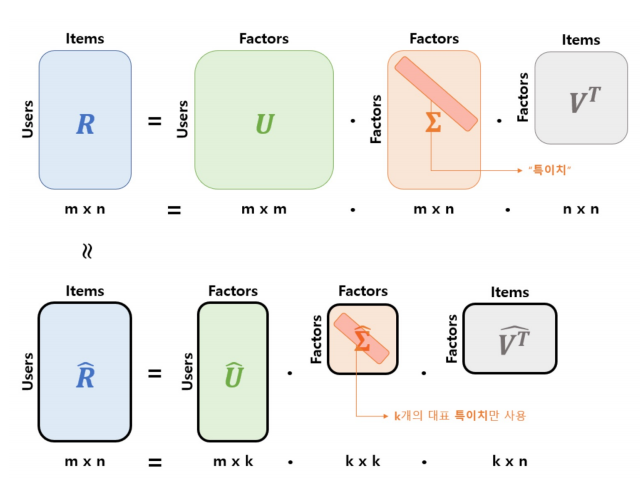

* **Full SVD : $R=U\Sigma V^T$**
    * $U$ : 유저의 Latent Factor
    * $V$ : 아이템의 Latent Factor
    * $\Sigma$ : Latent Factor의 중요도

* **Truncated SVD : $R = U\Sigma V^T \approx \hat{U}\Sigma_k\hat{V^T} = \hat{R}$**
    * 대표값으로 사용될 k개의 특이값만 사용함
    * k는 모델의 하이퍼 파라미터
    
    * 평점 예측 $\hat{R}$ 은 축소된 $\hat{U}\Sigma_k\hat{V^T}$에 의해 계산됨
    * k개의 LatentFactor의 의미를 유추할 수 있지만 정확히 어떤 특성을 갖는 지 알 수 없음

## SVD의 단점

* **분해(Decomposition)하려는 행렬의 Knowledge가 불완전할 때 정의되지 않음**
    * Sparsity가 높은 데이터의 경우 결측치가 매우 많고,실제 데이터는 대부분 SparseMatrix임
* **따라서 결측된 entry를 모두 채우는 Imputation을 통해 DenseMatrix를 만들어 SVD를 수행함**
    * Imputation은 데이터의 양을 상당히 증가시키므로,Computation비용이 높아짐
    * ex)결측된 entry를 0or유저/아이템의 평균 평점으로 채움
* **정확하지 않은 Imputation은 데이터를 왜곡시키고 예측 성능을 떨어뜨림**
    * 행렬의 entry가 매우 적을 때 SVD를 적용하면 과적합 되기 쉬움

*  **SVD의 원리를 차용하되, MF를 학습하기 위한 근사적인 방법이 필요함**

## SVD Tutorial

In [23]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = '/Users/yeomyungro/Documents/github/recommendation/'

In [4]:
rating = pd.read_csv(path+'data/ml-latest-small/ratings.csv', encoding='utf-8')

In [5]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
train_df, test_df = train_test_split(rating, test_size=0.2, random_state=1990)
print(train_df.shape)
print(test_df.shape)

(80668, 4)
(20168, 4)


sparse matrix 생성

In [7]:
u_i_mt = train_df.pivot_table('rating', 'userId', 'movieId')
u_i_mt

movieId,1,2,3,4,5,6,7,8,9,10,...,190219,190221,193565,193567,193573,193579,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


유저 평균으로 빈 값 채우기

In [8]:
u_i_mt = u_i_mt.apply(lambda x: x.fillna(x.mean()), axis=1)
u_i_mt

movieId,1,2,3,4,5,6,7,8,9,10,...,190219,190221,193565,193567,193573,193579,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.000000,4.345946,4.000000,4.345946,4.345946,4.000000,4.345946,4.345946,4.345946,4.345946,...,4.345946,4.345946,4.345946,4.345946,4.345946,4.345946,4.345946,4.345946,4.345946,4.345946
2,3.863636,3.863636,3.863636,3.863636,3.863636,3.863636,3.863636,3.863636,3.863636,3.863636,...,3.863636,3.863636,3.863636,3.863636,3.863636,3.863636,3.863636,3.863636,3.863636,3.863636
3,2.397059,2.397059,2.397059,2.397059,2.397059,2.397059,2.397059,2.397059,2.397059,2.397059,...,2.397059,2.397059,2.397059,2.397059,2.397059,2.397059,2.397059,2.397059,2.397059,2.397059
4,3.548913,3.548913,3.548913,3.548913,3.548913,3.548913,3.548913,3.548913,3.548913,3.548913,...,3.548913,3.548913,3.548913,3.548913,3.548913,3.548913,3.548913,3.548913,3.548913,3.548913
5,4.000000,3.648649,3.648649,3.648649,3.648649,3.648649,3.648649,3.648649,3.648649,3.648649,...,3.648649,3.648649,3.648649,3.648649,3.648649,3.648649,3.648649,3.648649,3.648649,3.648649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.500000,3.655793,3.655793,3.655793,3.655793,3.655793,2.500000,3.655793,3.655793,3.655793,...,3.655793,3.655793,3.655793,3.655793,3.655793,3.655793,3.655793,3.655793,3.655793,3.655793
607,4.000000,3.770833,3.770833,3.770833,3.770833,3.770833,3.770833,3.770833,3.770833,3.770833,...,3.770833,3.770833,3.770833,3.770833,3.770833,3.770833,3.770833,3.770833,3.770833,3.770833
608,3.181682,3.181682,2.000000,3.181682,3.181682,3.181682,3.181682,3.181682,3.181682,3.181682,...,3.181682,3.181682,3.181682,3.181682,3.181682,3.181682,3.181682,3.181682,3.181682,3.181682


svd

In [10]:
def calculate_SVD(matrix, k=20):
    
    # svd
    u, sig, i = np.linalg.svd(matrix)
    
    # user matrix 중 k개 latent factor만 사용
    u_hat = u[:, :k]
    
    # item matrix 중 k개 latent factor만 사용
    i_hat = i[:k, :]
    
    # matrix의 singular value 값으로 가장 큰 값부터 내림차순으로 정렬되어 있음
    sig_hat = sig[:k] * np.identity(k, np.float)
    
    user_factors = u_hat
    item_factors = np.matmul(sig_hat, i_hat)
    
    return user_factors, item_factors

In [24]:
k = 50
u_f, i_f = calculate_SVD(u_i_mt, k)

In [25]:
print(u_f.shape)
print(i_f.shape)

(610, 50)
(50, 8889)


In [26]:
predicted_result = pd.DataFrame(np.matmul(u_f, i_f),
                                columns=u_i_mt.columns.values, index=u_i_mt.index.values)

In [27]:
predicted_result

,1,2,3,4,5,6,7,8,9,10,...,190219,190221,193565,193567,193573,193579,193583,193585,193587,193609
1,4.370431,4.262348,4.217864,4.339291,4.339997,4.111414,4.257744,4.332072,4.336647,4.252254,...,4.350739,4.350739,4.345887,4.345725,4.346050,4.345887,4.345887,4.345887,4.345887,4.345031
2,3.883732,3.850093,3.818132,3.858774,3.877029,3.840278,3.816102,3.856676,3.856487,3.873237,...,3.863654,3.863654,3.863159,3.861826,3.864492,3.863159,3.863159,3.863159,3.863159,3.863475
3,2.453323,2.421168,2.382111,2.406857,2.432541,2.356768,2.402420,2.402994,2.385062,2.425061,...,2.401475,2.401475,2.396621,2.395356,2.397886,2.396621,2.396621,2.396621,2.396621,2.396626
4,3.645982,3.507161,3.454385,3.523871,3.608412,3.163045,3.780318,3.529281,3.591193,3.871830,...,3.577985,3.577985,3.549718,3.551948,3.547488,3.549718,3.549718,3.549718,3.549718,3.545241
5,3.742979,3.613913,3.615609,3.628130,3.607402,3.713397,3.592645,3.636220,3.639177,3.674248,...,3.640050,3.640050,3.648422,3.647782,3.649061,3.648422,3.648422,3.648422,3.648422,3.649722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.105236,3.761777,3.637386,3.660818,3.567800,3.511978,2.397297,3.680628,3.688601,3.725348,...,3.651766,3.651766,3.655711,3.655482,3.655941,3.655711,3.655711,3.655711,3.655711,3.655129
607,3.787169,3.678564,3.856709,3.793776,3.733118,3.919602,3.724525,3.719104,3.747738,3.817528,...,3.767566,3.767566,3.770797,3.770674,3.770919,3.770797,3.770797,3.770797,3.770797,3.770971
608,2.893916,3.164213,1.901721,3.163576,3.209570,3.355826,3.174133,3.189146,3.113184,3.223939,...,3.174366,3.174366,3.182862,3.186225,3.179500,3.182862,3.182862,3.182862,3.182862,3.174843
609,3.296361,3.270063,3.277393,3.246198,3.249594,3.328758,3.246636,3.264096,3.253059,3.246370,...,3.261763,3.261763,3.264429,3.263646,3.265213,3.264429,3.264429,3.264429,3.264429,3.265251


In [29]:
global_rating = train_df['rating'].mean()

result = []

for _, row in tqdm(test_df.iterrows()):
    
    user_id = row['userId']
    movie_id = row['movieId']
    true_rating = row['rating']
    
    if user_id in predicted_result.index.values and movie_id in predicted_result.columns.values:
        pred_rating = predicted_result.loc[user_id][movie_id]
    else:
        pred_rating = global_rating
    
    result.append([user_id, movie_id, true_rating, pred_rating])

result_df = pd.DataFrame(result, columns=['user_id', 'movie_id', 'true_rating', 'pred_rating'])

0it [00:00, ?it/s]

In [30]:
result_df

,user_id,movie_id,true_rating,pred_rating
0,64.0,2291.0,4.0,3.945738
1,414.0,185.0,2.0,3.324490
2,60.0,1242.0,4.0,3.543975
3,230.0,1682.0,2.5,2.780944
4,431.0,3948.0,3.0,2.646946
...,...,...,...,...
20163,480.0,196.0,1.0,3.280587
20164,387.0,4881.0,3.5,3.240419
20165,318.0,1273.0,4.0,3.740444
20166,474.0,832.0,2.0,3.387607


In [31]:
print('RMSE : ', np.sqrt(mean_squared_error(result_df['true_rating'].values, result_df['pred_rating'].values)))

RMSE :  0.9345608577130071


## MF

* 실제 MF의 구현은 User Matrix, Item Matrix 2개로 이루어짐
* SVD로 분해된 행렬의 $\Sigma$를 $U$나 $V^T$에 곱해서 흡수시킨다면 MF와 같음
    * $(N\times K)\times(K\times K)\times(K\times M) = (N \times K)\times(K \times M) = (N\times M)$
    * $R \approx U \Sigma_k V^T = (U \Sigma_k)V^T = U'V^T = U(\Sigma_k V^T) = UV^{'T}$
    * $\hat{r_{u,i}} = \sum_k u_{ik}s_{kk}v_{kj} = \sum_k (u_{ik}s_{kk})v_{kj} = \sum_k u^{'}_{ik}v_{kj} = u^{'T}_iv_j$
* SVD를 통해 분해된 행렬은 결국 User Matrix, Item Matrix의 곱이 됨

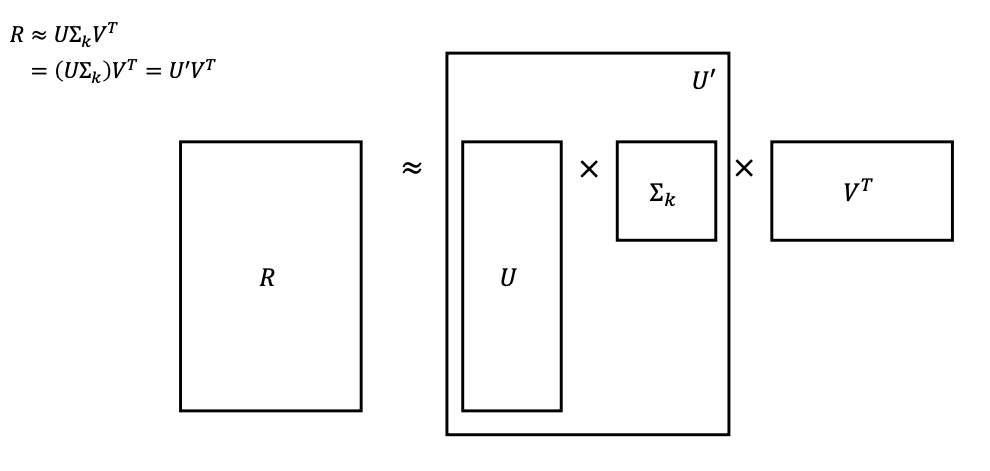

* Rating Matrix를 P와 Q로 분해
    * $R \approx P \times Q^T = \hat{R}$
        * $P -> |U|\times k$
        * $Q -> |I|\times k$
    * 평점 예측치 : $\hat{r}_{u,i} = p^T_uq_i$
* MF 학습
    * $R$과 $\hat{R}$이 최대한 유사하도록 X, Y를 학습하는 과정
    * $\underset{P,Q}{min} \underset{observed r_{u,i}}\sum (r_{u,i}-p^T_uq_i)^2$

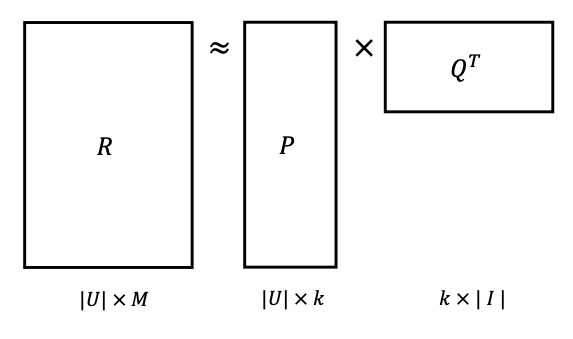

## MF - SGD

### Objective Function

$$\underset{P,Q}{min} \underset{observed r_{u,i}}\sum (r_{u,i}-p^T_uq_i)^2 + \lambda(||p_u||^2_2+||q_i||^2_2)$$

* $r_{u,i}$ : 학습 데이터에 있는 유저 u의 아이템 i에 대한 실제 rating
* $p_u$ : 유저 u의 latent vector, $q_i$ : 아이템 i의 latent vector
    * 이는 최적화 문제를 통해 업데이트 된느 파라미터
* 실제 관측된 데이터만을 사용하여 모델을 학습
    * SBD는 행렬 분해를 위해 결측 entry를 채워넣었음
* $\lambda $ term은 L2 Regularization을 의미
    * 학습 데이터에 과적합되는 것을 방지
    * 학습 데이터에 지나치게 overfitting되는 경우 weight의 값이 커지게 됨
        -> weight의 크기를 loss function에 넣어주면 weight에 제한이 걸리게 됨
    * Regularization term에 곱해지는 $\lambda$의 크기에 따라 영향도가 달라짐
    * L1 : $\lambda \sum_j |w_j|$
    * L2 : $\lambda \sum_j w^2_j$

### Adding bias

* Bias가 추가된 Functions
$$\underset{P,Q}{min} \underset{observed r_{u,i}}\sum (r_{u,i} -\mu -b_u -b_i  -p^T_uq_i)^2 + \lambda(||p_u||^2_2+||q_i||^2_2 + b^2_u + b^2_i)$$

* 어떤 유저는 모든 영화에 대해서 평점을 짜게 줄 수도 있음
    * 아이템도 편향이 생길 수 있는 것은 마찬가지
* 전체 평균($\mu$), 유저/아이템의 bias($b_u, b_i$)를 추가하여 예측 성능을 높임

* Error
$$e_{ui} = r_{ui}-\mu-b_u-b_i-p^T_u q_i$$
* parameter update
$$b_u <- b_u+\gamma + (e_{ui} - \lambda b_u)$$
$$b_i <- b_i+\gamma + (e_{ui} - \lambda b_i)$$
$$p_u <- p_u+\gamma + (e_{ui}*q_i - \lambda p_u)$$
$$q_i <- q_i+\gamma + (e_{ui}*p_u - \lambda q_i)$$

### MF - SGD tutorial

In [5]:
import os
import pandas as pd
import seaborn as sns
import scipy
import numpy as np
import random
from matplotlib import pyplot as plt
from datetime import datetime
from tqdm import tqdm
%matplotlib inline

from surprise import KNNBasic, KNNWithMeans, SVD
from surprise.model_selection.validation import cross_validate

In [6]:
path = '/Users/yeomyungro/Documents/github/recommendation/'

In [7]:
rating = pd.read_csv(path+'data/ml-latest-small/ratings.csv', encoding='utf-8')

In [8]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
# 학습데이터, 하이퍼파라미터 initialize

u_i_mt = rating.pivot_table('rating', 'userId', 'movieId').fillna(0)
R = u_i_mt.to_numpy()

# latent factor 수
K = 20
learning_rate = 0.01

# l2 정규화 파라미터
regularization = 0.2

# 학습 반복 횟수
iterations = 20

num_users, num_items = u_i_mt.shape

In [20]:
# 학습 파라미터 initialize

# 평균이 0, 표준편차는 1/K로 랜덤하게 initialize
P = np.random.normal(scale=1./K, size=(num_users, K))
Q = np.random.normal(scale=1./K, size=(num_items, K))

# Initialize the biases

# 유저별 bias
b_u = np.zeros(num_users)
# 아이템별 bias
b_i = np.zeros(num_items)
# 전체 bias
b = np.mean(R[np.where(R!=0)])

In [11]:
R.shape

(610, 9724)

In [21]:
# 학습 데이터 구성
# 실제 평가를 내린 데이터만 학습에 사용
samples = [(i, j, R[i, j]) for i in range(num_users) for j in range(num_items) if R[i,j]>0]

In [22]:
len(samples)

100836

In [23]:
training_result = []

for epoch in range(iterations):
    
    # 학습 데이터 순서 셔플링
    np.random.shuffle(samples)
    
    for i, j, r in samples:
        
        # 현재 주어진 파라미터로 predicted rating을 구함
        prediction = b + b_u[i] + b_i[j] + P[i, :].dot(Q[j,:].T)
        # 실제 rating과 predicted rating의 차이가 error
        e = (r - prediction)
        
        # 유저, 아이템 bias 파라미터 업데이트
        b_u[i] += learning_rate * (e - regularization * b_u[i])
        b_i[j] += learning_rate * (e - regularization * b_i[j])
        
        # 유저, 아이템 잠재 행렬 파라미터 업데이트
        P[i,:] += learning_rate * (e * Q[j,:] - regularization * P[i,:])
        Q[j,:] += learning_rate * (e * P[i,:] - regularization * Q[j,:])
    
    # 학습 종료 후 학습 데이터를 사용하여 training loss를 계산
    ut, it = R.nonzero()
    predicted_R = b + b_u[:, np.newaxis] + b_i[np.newaxis:,] + P.dot(Q.T)
    error = []
    for x, y in zip(ut, it):
        error.append(pow(R[x,y] - predicted_R[x,y], 2))
    rmse = np.sqrt(np.asarray(error).mean())
    print(epoch+1, rmse)
    training_result.append([epoch+1, rmse])
    
training_result_pd = pd.DataFrame(training_result, columns=['iteration', 'rmse'])

1 0.8977606706730906
2 0.8765258514792278
3 0.8653921757180773
4 0.8576777779820858
5 0.8520637838154071
6 0.8473058535502085
7 0.8434063205036829
8 0.8398623702882896
9 0.8368808023594668
10 0.8354597869961423
11 0.8333160368846982
12 0.8304241338509442
13 0.8291407403927753
14 0.8282539701644015
15 0.8261805394565505
16 0.8253867965714731
17 0.8242092330328377
18 0.8224874183724538
19 0.8218537647641581
20 0.8208390164993232


### Surprise 사용

In [25]:
from surprise import Reader, Dataset

reader = Reader(rating_scale=(0.5, 5.0))
data= Dataset.load_from_df(rating[['userId', 'movieId', 'rating']], reader)

In [28]:
from surprise import accuracy
from surprise.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=1990)

In [29]:
svd_model = SVD(n_factors=20, reg_all=0.02)
svd_model.fit(train_data)
predictions = svd_model.test(test_data)
accuracy.rmse(predictions)

RMSE: 0.8626


0.8626253617101637

In [30]:
# 유저/아이템 매트릭스
print(svd_model.pu.shape)
print(svd_model.qi.shape)

(610, 20)
(9006, 20)


In [31]:
# 유저 0의 latent factor
svd_model.pu[0]

array([ 0.11068336, -0.00645406, -0.11750142, -0.1630416 ,  0.1216842 ,
       -0.05399078, -0.06424854, -0.05459152, -0.1585454 ,  0.14996228,
        0.03876181, -0.00103465, -0.01806335,  0.17305334, -0.00385277,
        0.02532126, -0.05239645, -0.16221135,  0.15956442, -0.07200776])

In [32]:
# 아이템 0의 latent factor
svd_model.qi[0]

array([ 0.10184596, -0.01739359, -0.17441195,  0.12288209,  0.07868194,
       -0.02632647,  0.00239583,  0.02016343,  0.03342557,  0.17476128,
       -0.0383213 ,  0.14979601, -0.11269695,  0.08009429, -0.20054542,
        0.00693769, -0.15007566,  0.02437644, -0.14190013, -0.10810695])

In [33]:
# 평점 예측
user_id = 1
item_id = 1

svd_model.predict(user_id, item_id)

Prediction(uid=1, iid=1, r_ui=None, est=4.685387062037877, details={'was_impossible': False})

In [34]:
# 새로운 유저, 아이템이 등장할 경우 default_prediction을 사용
user_id = 0
item_id = 0
print(svd_model.predict(user_id, item_id).est)
print(svd_model.default_prediction())

3.499497942182774
3.499497942182774


In [36]:
# bias 유무에 따른 성능 비교

for biased in [False, True]:
    svd_model = SVD(biased=biased)
    svd_model.fit(train_data)
    predictions = svd_model.test(test_data)
    
    print('biased:', biased, ',', accuracy.rmse(predictions))

RMSE: 0.9732
biased: False , 0.9732479362166884
RMSE: 0.8642
biased: True , 0.8642471868769906


In [37]:
# latent factor 수에 따른 성능 비교
for k in [25, 50, 100, 150]:
    svd_model = SVD(n_factors=k)
    svd_model.fit(train_data)
    predictions = svd_model.test(test_data)
    
    print('n_factors:', k, ',', accuracy.rmse(predictions))

RMSE: 0.8603
n_factors: 25 , 0.8603267581478574
RMSE: 0.8622
n_factors: 50 , 0.8621548437618523
RMSE: 0.8646
n_factors: 100 , 0.864596306054653
RMSE: 0.8677
n_factors: 150 , 0.8676773225376555


In [38]:
# learning rate에 따른 성능 비교
for lr_all in [.0025, .005, .001]:
    svd_model = SVD(lr_all=lr_all)
    svd_model.fit(train_data)
    predictions = svd_model.test(test_data)
    
    print('lr_all:', lr_all, ',', accuracy.rmse(predictions))

RMSE: 0.8720
lr_all: 0.0025 , 0.8719751474421699
RMSE: 0.8661
lr_all: 0.005 , 0.8660841024706593
RMSE: 0.8878
lr_all: 0.001 , 0.8878419213257785


In [40]:
# regularization에 따른 성능 비교
for reg_all in [0, 0.02, 0.1, 1]:
    svd_model = SVD(reg_all=reg_all)
    svd_model.fit(train_data)
    predictions = svd_model.test(test_data)
    
    print('reg_all:', reg_all, ',', accuracy.rmse(predictions))

RMSE: 0.8922
reg_all: 0 , 0.8921965513640095
RMSE: 0.8629
reg_all: 0.02 , 0.862922522413185
RMSE: 0.8612
reg_all: 0.1 , 0.8612341780938333
RMSE: 0.8994
reg_all: 1 , 0.8994414325624123


In [42]:
# Grid Search 패키지
from surprise.model_selection import GridSearchCV

grid = {'lr_all': [.0025, .005],
        'n_factors': [25, 50, 100],
        'reg_all': [0.02, 0.1]}

gs = GridSearchCV(SVD, grid, measures=['RMSE'], cv=2)
gs.fit(data)

In [44]:
pd.DataFrame(gs.cv_results).sort_values(by='rank_test_rmse')

,split0_test_rmse,split1_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,mean_fit_time,std_fit_time,mean_test_time,std_test_time,params,param_lr_all,param_n_factors,param_reg_all
7,0.882655,0.881691,0.882173,0.000482,1,0.611517,0.002843,0.164801,0.002935,"{'lr_all': 0.005, 'n_factors': 25, 'reg_all': ...",0.0050,25,0.10
9,0.882513,0.881931,0.882222,0.000291,2,0.884528,0.004167,0.162707,0.001258,"{'lr_all': 0.005, 'n_factors': 50, 'reg_all': ...",0.0050,50,0.10
11,0.882950,0.882797,0.882874,0.000077,3,1.411001,0.002783,0.164616,0.001138,"{'lr_all': 0.005, 'n_factors': 100, 'reg_all':...",0.0050,100,0.10
6,0.884243,0.883284,0.883763,0.000480,4,0.611008,0.001146,0.162477,0.001044,"{'lr_all': 0.005, 'n_factors': 25, 'reg_all': ...",0.0050,25,0.02
8,0.886634,0.885192,0.885913,0.000721,5,0.883245,0.003999,0.142917,0.020468,"{'lr_all': 0.005, 'n_factors': 50, 'reg_all': ...",0.0050,50,0.02
0,0.890536,0.888954,0.889745,0.000791,6,0.638498,0.028988,0.140567,0.023582,"{'lr_all': 0.0025, 'n_factors': 25, 'reg_all':...",0.0025,25,0.02
1,0.890813,0.889965,0.890389,0.000424,7,0.611032,0.008474,0.159258,0.004121,"{'lr_all': 0.0025, 'n_factors': 25, 'reg_all':...",0.0025,25,0.10
3,0.891582,0.890658,0.891120,0.000462,8,0.883352,0.002014,0.159515,0.001050,"{'lr_all': 0.0025, 'n_factors': 50, 'reg_all':...",0.0025,50,0.10
10,0.892045,0.890516,0.891281,0.000764,9,1.407865,0.000573,0.164603,0.001721,"{'lr_all': 0.005, 'n_factors': 100, 'reg_all':...",0.0050,100,0.02
2,0.892659,0.891397,0.892028,0.000631,10,0.881749,0.002560,0.159718,0.000809,"{'lr_all': 0.0025, 'n_factors': 50, 'reg_all':...",0.0025,50,0.02


In [45]:
print(gs.best_score)
print(gs.best_params)

{'rmse': 0.88217279002725}
{'rmse': {'lr_all': 0.005, 'n_factors': 25, 'reg_all': 0.1}}


## MF - ALS(Alterative Least Squar)

* 유저와 아이템 매트릭스를 번갈아가면서 업데이트함
    * 두 매트릭스 중 하나를 상수로 놓고 나머지 매트릭스를 업데이트
    * $p_u, q_i$ 가운데 하나를 고정하고 least-square 문제를 푸는 것
* Sparse한 데이터에 대해 SGD보다 Robust한 모습을 보임
* SGD와 다르게 병렬 처리가 가능
    * Spark와 같은 분산 처리 시스템에서 대용량 데이터에 대해 빠른 학습 가능

* Objective Function
$$\underset{P,Q}{min} \underset{observed r_{u,i}}\sum (r_{u,i}-p^T_uq_i)^2 + \lambda(||p_u||^2_2+||q_i||^2_2)$$

* 아래 수식을 사용해 P, Q를 번갈아 가면서 업데이트
$$p_u = (Q^TQ + \lambda I)^{-1}Q^T r_u$$
$$q_i = (P^TP + \lambda I)^{-1}P^T r_i$$

### MF - ALS tutorial

In [46]:
# 유저-아이템 행렬

R = np.array([
        [1, 0, 0, 1, 3],
        [2, 0, 3, 1, 1],
        [1, 2, 0, 5, 0],
        [1, 0, 0, 4, 4],
        [2, 1, 5, 4, 0],
        [5, 1, 5, 4, 0],
        [0, 0, 0, 1, 0],
    ])


In [47]:
# 학습 데이터, 하이퍼파라미터 초기화

# Latent Factor 수
k = 5

# l2 하이퍼파라미터
regularization = 0.01
num_users, num_items = R.shape

# ALS 업데이트 횟수
iterations = 100

In [48]:
# 유저, 아이템 잠재요인 매트릭스
users = np.random.normal(scale=1./k, size=(num_users, k))
items = np.random.normal(scale=1./k, size=(num_items, k))

In [49]:
items.shape

(5, 5)

In [50]:
users.shape

(7, 5)

In [52]:
training_process = []
for epoch in range(iterations):
    for i, Ri in enumerate(R):
        users[i] = np.linalg.solve(np.dot(items.T, items) + regularization * np.eye(k), \
                                   np.dot(items.T, R[i].T)).T
    
    for j, Rj in enumerate(R.T):
        items[j] = np.linalg.solve(np.dot(users.T, users) + regularization * np.eye(k), \
                                   np.dot(users.T, R[:,j]))
    
    cost = 0
    xi, yi = R.nonzero()
    for x, y in zip(xi, yi):
        cost += pow(R[x,y] - users[x,:].dot(items[y,:].T), 2)
    
    cost = np.sqrt(cost/len(xi))
    training_process.append((epoch, cost))
    
    if (epoch + 1) % 10 == 0:
        print("Iteration: %d, cost = %.4f" % (epoch + 1, cost))
        

Iteration: 10, cost = 0.0008
Iteration: 20, cost = 0.0011
Iteration: 30, cost = 0.0013
Iteration: 40, cost = 0.0016
Iteration: 50, cost = 0.0018
Iteration: 60, cost = 0.0020
Iteration: 70, cost = 0.0021
Iteration: 80, cost = 0.0022
Iteration: 90, cost = 0.0024
Iteration: 100, cost = 0.0025


In [53]:
R

array([[1, 0, 0, 1, 3],
       [2, 0, 3, 1, 1],
       [1, 2, 0, 5, 0],
       [1, 0, 0, 4, 4],
       [2, 1, 5, 4, 0],
       [5, 1, 5, 4, 0],
       [0, 0, 0, 1, 0]])

In [54]:
R_hat = users.dot(items.T)
R_hat

array([[ 9.99039166e-01, -4.72947793e-03,  3.10083968e-05,
         1.00230632e+00,  2.99630161e+00],
       [ 1.99996651e+00, -9.95908820e-04,  2.99829118e+00,
         1.00134249e+00,  9.98397768e-01],
       [ 9.99817427e-01,  1.99525666e+00,  1.82121189e-03,
         4.99861148e+00,  1.06090316e-03],
       [ 1.00068184e+00,  4.61489985e-03,  6.44087127e-04,
         3.99760330e+00,  3.99819721e+00],
       [ 2.00466528e+00,  9.99275532e-01,  4.99586144e+00,
         3.99907139e+00, -5.62949044e-04],
       [ 4.99492132e+00,  1.00150403e+00,  5.00140620e+00,
         4.00002956e+00,  1.71639952e-03],
       [ 3.30107511e-04,  4.18818030e-03,  4.57059850e-04,
         9.97988003e-01,  1.26812138e-03]])

### Implicit Library

In [97]:
import os
import pandas as pd
import seaborn as sns
import scipy
from scipy import sparse
import numpy as np
import random
from matplotlib import pyplot as plt
from datetime import datetime
from tqdm import tqdm
%matplotlib inline

In [66]:
os.listdir(path+'data')

['.DS_Store', 'ml-latest-small', 'online_retail_II.xlsx']

In [71]:
retail = pd.read_excel(path+'data/online_retail_II.xlsx')

In [74]:
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [72]:
retail.shape

(525461, 8)

In [77]:
retail.columns = ['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'CustomerId', 'Country']

In [79]:
cleaned_retail = retail[~(retail['CustomerId'].isnull()) & (retail['Quantity']>0)]
cleaned_retail.shape

(407695, 8)

In [80]:
# 시간을 기준으로 전후 데이터를 train / test로 나눔
cleaned_retail['ym'] = cleaned_retail['InvoiceDate'].apply(lambda x: str(x)[:7])

<ipython-input-80-1f39ed70e5a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_retail['ym'] = cleaned_retail['InvoiceDate'].apply(lambda x: str(x)[:7])


<AxesSubplot:xlabel='ym'>

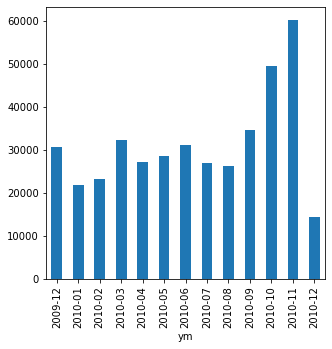

In [82]:
cleaned_retail.groupby(['ym'])['StockCode'].count().plot.bar(figsize=(5,5))

In [131]:
# 2010-10 까지의 데이터를 train, 2010-11이후의 데이터를 test 데이터로 사용
train_df = cleaned_retail[cleaned_retail['ym']<='2010-10']
test_df = cleaned_retail[cleaned_retail['ym']>'2010-10']

<AxesSubplot:xlabel='ym'>

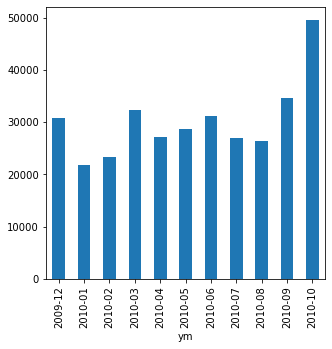

In [91]:
train_df.groupby(['ym'])['StockCode'].count().plot.bar(figsize=(5,5))

<AxesSubplot:xlabel='ym'>

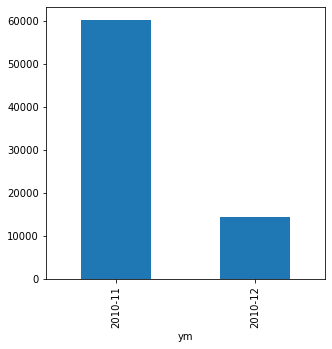

In [93]:
test_df.groupby(['ym'])['StockCode'].count().plot.bar(figsize=(5,5))

In [92]:
print(train_df.shape)
print(test_df.shape)

(332874, 9)
(74821, 9)


In [132]:
# 기간 동안 구매한 사용자 별로 아이템은 group by 해서 quantity를 계산
train_df = train_df.groupby(['CustomerId', 'StockCode']).sum().reset_index()
test_df = test_df.groupby(['CustomerId', 'StockCode']).sum().reset_index()

In [133]:
train_df.head()

,CustomerId,StockCode,Quantity,Price
0,12346.0,20679,1,5.95
1,12346.0,20682,1,3.25
2,12346.0,20685,1,7.49
3,12346.0,21523,1,7.49
4,12346.0,21524,1,7.49


In [134]:
# implicit 라이브러리에 넣기 위해서 사용자 id 와 아이템 id를 category type으로 변경
train_df['CustomerId'] = train_df['CustomerId'].astype('category')
train_df['StockCode'] = train_df['StockCode'].astype('category')
train_df['user_id'] = train_df['CustomerId'].cat.codes
train_df['item_id'] = train_df['StockCode'].cat.codes

In [135]:
# 새로운 user_id => 기존 CustomerId
user_id_map = dict(enumerate(train_df['CustomerId'].cat.categories))
# 새로운 item_id => 기존 StockCode
item_id_map = dict(enumerate(train_df['StockCode'].cat.categories))
train_user_list = list(user_id_map.values())
train_item_list = list(item_id_map.values())

In [136]:
user_id_map

{0: 12346.0,
 1: 12347.0,
 2: 12348.0,
 3: 12349.0,
 4: 12353.0,
 5: 12355.0,
 6: 12356.0,
 7: 12358.0,
 8: 12359.0,
 9: 12360.0,
 10: 12361.0,
 11: 12362.0,
 12: 12366.0,
 13: 12368.0,
 14: 12369.0,
 15: 12370.0,
 16: 12371.0,
 17: 12373.0,
 18: 12374.0,
 19: 12376.0,
 20: 12377.0,
 21: 12378.0,
 22: 12379.0,
 23: 12380.0,
 24: 12387.0,
 25: 12388.0,
 26: 12389.0,
 27: 12391.0,
 28: 12392.0,
 29: 12393.0,
 30: 12395.0,
 31: 12396.0,
 32: 12399.0,
 33: 12400.0,
 34: 12402.0,
 35: 12403.0,
 36: 12404.0,
 37: 12406.0,
 38: 12408.0,
 39: 12409.0,
 40: 12410.0,
 41: 12411.0,
 42: 12412.0,
 43: 12414.0,
 44: 12415.0,
 45: 12416.0,
 46: 12417.0,
 47: 12418.0,
 48: 12419.0,
 49: 12421.0,
 50: 12422.0,
 51: 12423.0,
 52: 12424.0,
 53: 12425.0,
 54: 12426.0,
 55: 12429.0,
 56: 12431.0,
 57: 12433.0,
 58: 12435.0,
 59: 12437.0,
 60: 12439.0,
 61: 12440.0,
 62: 12443.0,
 63: 12445.0,
 64: 12449.0,
 65: 12450.0,
 66: 12451.0,
 67: 12454.0,
 68: 12455.0,
 69: 12457.0,
 70: 12458.0,
 71: 12459.0,
 7

In [137]:
# 나중에 test 데이터를 가지고 유저 별 성능을 평가할 때 사용

# 기존 CustomerId => 새로운 user_id
customer_id_map = dict()
# 기존 StockCode => 새로운 item_id
stock_code_map = dict()

for x, y in zip(user_id_map.keys(), user_id_map.values()):
    customer_id_map[y] = x
    
for x, y in zip(item_id_map.keys(), item_id_map.values()):
    stock_code_map[y] = x

In [138]:
stock_code_map

{10002: 0,
 10080: 1,
 10109: 2,
 10120: 3,
 10125: 4,
 10133: 5,
 10134: 6,
 10135: 7,
 10138: 8,
 11001: 9,
 15030: 10,
 15034: 11,
 15036: 12,
 15039: 13,
 16008: 14,
 16010: 15,
 16011: 16,
 16012: 17,
 16014: 18,
 16015: 19,
 16016: 20,
 16033: 21,
 16043: 22,
 16044: 23,
 16045: 24,
 16046: 25,
 16047: 26,
 16048: 27,
 16049: 28,
 16050: 29,
 16051: 30,
 16052: 31,
 16053: 32,
 16054: 33,
 16119: 34,
 16212: 35,
 16215: 36,
 16216: 37,
 16218: 38,
 16219: 39,
 16225: 40,
 16235: 41,
 16236: 42,
 16237: 43,
 16238: 44,
 16239: 45,
 16254: 46,
 16259: 47,
 17001: 48,
 17003: 49,
 17021: 50,
 17033: 51,
 17038: 52,
 17039: 53,
 17061: 54,
 17096: 55,
 17174: 56,
 17178: 57,
 17181: 58,
 18007: 59,
 18010: 60,
 20615: 61,
 20616: 62,
 20617: 63,
 20618: 64,
 20619: 65,
 20620: 66,
 20621: 67,
 20622: 68,
 20652: 69,
 20653: 70,
 20654: 71,
 20655: 72,
 20657: 73,
 20658: 74,
 20659: 75,
 20660: 76,
 20661: 77,
 20662: 78,
 20663: 79,
 20664: 80,
 20665: 81,
 20666: 82,
 20667: 83,
 2

In [139]:
train_df.head()

,CustomerId,StockCode,Quantity,Price,user_id,item_id
0,12346.0,20679,1,5.95,0,94
1,12346.0,20682,1,3.25,0,97
2,12346.0,20685,1,7.49,0,100
3,12346.0,21523,1,7.49,0,741
4,12346.0,21524,1,7.49,0,742


In [140]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230899 entries, 0 to 230898
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   CustomerId  230899 non-null  category
 1   StockCode   230899 non-null  category
 2   Quantity    230899 non-null  int64   
 3   Price       230899 non-null  float64 
 4   user_id     230899 non-null  int16   
 5   item_id     230899 non-null  int16   
dtypes: category(2), float64(1), int16(2), int64(1)
memory usage: 5.6 MB


In [141]:
sparse_user_item = sparse.csr_matrix((train_df['Quantity'].astype(float),
                                    (train_df['user_id'], train_df['item_id'])))

In [143]:
matrix_size = sparse_user_item.shape[0]*sparse_user_item.shape[1]
num_purchases = len(sparse_user_item.nonzero()[0])
sparsity = 100 * (1 - (num_purchases/matrix_size))
print(sparsity)

98.51748812990174


In [144]:
import implicit

In [145]:
# 모델 초기화
model = implicit.als.AlternatingLeastSquares(factors=20, regularization=0.1, iterations=100)

alpha = 1

model.fit(alpha * sparse_user_item.T)

  0%|          | 0/100 [00:00<?, ?it/s]

In [146]:
user_vecs = model.user_factors
item_vecs = model.item_factors
print(user_vecs.shape)
print(item_vecs.shape)

(3943, 20)
(3950, 20)


In [147]:
# 유저 0에게 가장 적합한 아이템 10개 추천
[(item, score) for item, score in model.recommend(0, sparse_user_item.T, 10)]

[(2124, 0.18620157),
 (741, 0.1668749),
 (2132, 0.16638973),
 (2129, 0.16527109),
 (742, 0.16327415),
 (2675, 0.16178472),
 (100, 0.15871729),
 (1204, 0.15846129),
 (94, 0.15690145),
 (3160, 0.15689552)]

In [153]:
# Top N Recommendation
k = 20

# training data에 user가 없는 경우엔 추천이 안되므로 인기도 기반 추천 리스트를 미리 만들어 놓음
popular_item_at_k = list(train_df.groupby('item_id')['Quantity'].sum().sort_values(ascending=False)[:k].index)

precisions = []
recalls = []

# 사용자 별로 Top N 추천을 하여 사용자 별 precision recall을 계산
cold_start = 0
user_grouped = test_df.groupby('CustomerId')
for customer_id, user_df in tqdm(user_grouped):
    
    # test 데이터에 존재하는 사용자가 이미 구매한 아이템 = 정답
    buy_items = [stock_code_map[stock_code] if stock_code in stock_code_map else stock_code \
                 for stock_code in user_df['StockCode'].unique()]
    
    if customer_id in customer_id_map:
        user_id = customer_id_map[customer_id]
        user_vector = model.user_factors[user_id]
        scores = item_vecs.dot(user_vector)
        top_k_item = np.argpartition(scores, -k)[-k:]
        
        # 모델에서 top k 아이템을 선정하는 함수를 이미 제공함
        # top_k_item = [item for item, _ in model.recommend(user_id, sparse_user_item.T, k, filter_already_liked_items=False)]
        
    else:
        cold_start += 1
        top_k_item = popular_item_at_k
    
    intersect = set(buy_items).intersection(set(top_k_item))
    
    precision = len(intersect)/len(top_k_item)
    recall = len(intersect)/len(buy_items)
    
    precisions.append(precision)
    recalls.append(recall)

print('precision@k', np.mean(np.asarray(precisions)))
print('recall@k', np.mean(np.asarray(recalls)))
print('colde_start_user', cold_start)

100%|██████████| 1834/1834 [00:00<00:00, 8119.93it/s]

precision@k 0.12347328244274809
recall@k 0.12098344601875116
colde_start_user 371
